<a href="https://colab.research.google.com/github/sunny9sinha/Blog_Clustering/blob/main/K_Medians.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use the first two features for clustering

In [2]:
from sklearn.preprocessing import StandardScaler

# Scaling Data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [9]:
def kmedians(X, k):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False), :]

    while True:
        # Assign each data point to the nearest centroid
        distances = np.abs(X[:, np.newaxis, :] - centroids)
        labels = np.argmin(distances.sum(axis=2), axis=1)

        # Update centroids to the median value of their assigned data points
        new_centroids = np.zeros_like(centroids)
        for i in range(k):
            new_centroids[i, :] = np.median(X[labels == i, :], axis=0)

        # Check for convergence
        if np.array_equal(centroids, new_centroids):
            break
        else:
            centroids = new_centroids

    return labels, centroids


In [10]:
labels, centroids = kmedians(X, k=3)

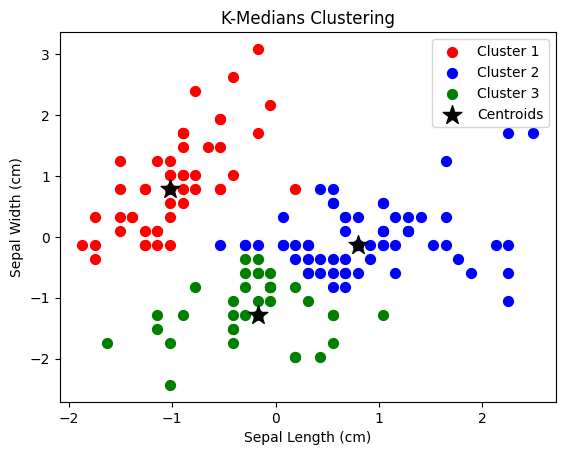

In [11]:
import matplotlib.pyplot as plt

colors = ['red', 'blue', 'green']
for i in range(3):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, c=colors[i], label='Cluster ' + str(i+1))
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505', label='Centroids')
plt.title('K-Medians Clustering')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()